In [138]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [139]:
real_values = [1558.04, 1558.04, 1557.47, 1557.95, 1557.66, 1557.76, 1558.04, 1558.24, 1557.76]

In [238]:
class Kalman:
    def __init__(self):
        self.f_1 = 1.00000
        self.update_x = 0.0
        self.prev_x = 1557
        self.update_p = 0.0
        self.prev_p = 0.0
        self.kalman_gain = 0.0
        self.error_cov = 0.1
        self.process_noise = 0.01
        self.x_temp = 0.0
        self.p_temp = 0.0
    
    def singleVarKalmanCal(self, altitude):
        # Predict x_temp, p_temp
        self.x_temp = self.prev_x
        self.p_temp = self.prev_p + self.process_noise

        # Update kalman values
        self.kalman_gain = (self.f_1 / (self.p_temp + self.error_cov)) * self.p_temp
        #print(self.kalman_gain)
        self.update_x = self.x_temp + (self.kalman_gain * (altitude - self.x_temp))
        #print(self.x_temp + (self.kalman_gain * (altitude - self.x_temp)))
        self.update_p = (self.f_1 - self.kalman_gain) * self.p_temp

        # Save this state for next time
        self.prev_x = self.update_x
        self.prev_p = self.update_p

        return [self.update_x, self.kalman_gain, self.update_p]

In [239]:
my = Kalman()

In [240]:
filtered_values = [ my.singleVarKalmanCal(i)[0] for i in real_values]

In [241]:
all_values = [ my.singleVarKalmanCal(i) for i in real_values]

In [242]:
all_values

[[1557.8775259718436, 0.26929791480109444, 0.02692979148010945],
 [1557.9213450116295, 0.2696987345188056, 0.026969873451880563],
 [1557.7995213759455, 0.2699124451251581, 0.02699124451251581],
 [1557.8401545682061, 0.2700263410566812, 0.027002634105668125],
 [1557.7914971565199, 0.27008702677299284, 0.027008702677299278],
 [1557.7829891648519, 0.27011935704892404, 0.027011935704892406],
 [1557.8524171928336, 0.270136579813103, 0.0270136579813103],
 [1557.9571210426195, 0.2701457542747982, 0.027014575427479825],
 [1557.9038686665301, 0.27015064136056965, 0.027015064136056966]]

In [243]:
filtered_values

[1557.0945454545454,
 1557.246106870229,
 1557.292350090854,
 1557.4466482777802,
 1557.5001405393014,
 1557.5676145955458,
 1557.6925698997825,
 1557.8388111785353,
 1557.8176466887842]

In [244]:
filtered_values[5:]

[1557.5676145955458,
 1557.6925698997825,
 1557.8388111785353,
 1557.8176466887842]

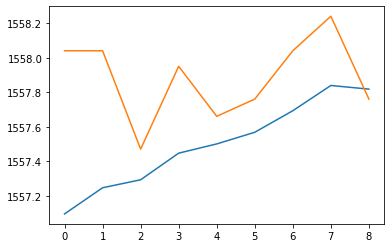

In [245]:
plt.plot(range(0, 9, 1), filtered_values[:], real_values[:])

In [189]:
for i, j in zip(real_values, all_values):
    print(i, j[0], j[1], j[2])
    break

1558.04 1442.5289798664564 0.26929791480109444 0.02692979148010945


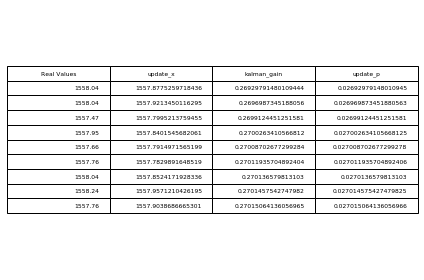

In [246]:
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create data
df = pd.DataFrame(np.array([[i, j[0], j[1], j[2]] for i,j in zip(real_values, all_values)]).reshape(9,4), columns=['Real Values', 'update_x', 'kalman_gain', 'update_p'])

#create table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.set_fontsize(16)
table.scale(1,1)

#display table
fig.tight_layout()
plt.savefig("img/singleUpdates.jpeg", transparent=False, optimize=True)
plt.show()


In [70]:
for i in real_values:
    x = my.singleVarKalmanCal(altitude=i)
    print(i, ""x)

1558.04 	 1038.6933333333332
1558.04 	 1416.4
1557.47 	 1519.6219512195123
1557.95 	 1547.6790849673203
1557.66 	 1554.9856042031524
1557.76 	 1557.0166025340216
1558.04 	 1557.7657814661134
1558.24 	 1558.1129335264984
1557.76 	 1557.8545682534236


In [77]:
filtered_values

[1557.990313713253,
 1558.0266865995911,
 1557.6191637247978,
 1557.8613526872327,
 1557.7139522899379,
 1557.7476615532755,
 1557.9616681492835,
 1558.1654212053727,
 1557.868632284574]